# Pandas
Pandas is a Python library for data manipulation and analysis.

Some of the reasons it's useful:

* Easy read and write from different sources/formats.
* Easy to do common tasks like handling missing data.
* Well-suited for tabular data with different types of columns.
* Plays well with other libraries like Numpy (in fact, builds on top of it).

Basically, it's easy to load, process and analyze data with *Pandas*.

Let's start.

In [1]:
import pandas as pd

## Data Structures
The main data structures in *Pandas* are **Series** and **DataFrame**.

### Series

* One-dimensional array-like structure
* Capable of holding any (one) data type
* Has indices

So, it is basically analogous to 1D numpy array with row labels and a name.

![A series is an indexed array](../resources/Series.png)

In [2]:
# simple pandas series
s = pd.Series([22, 12, 18, 25, 30])
s

0    22
1    12
2    18
3    25
4    30
dtype: int64

In [3]:
# series with custom string index and a name
s = pd.Series([22, 12, 18, 25, 30], index=['Anna', 'Bob', 'Carol', 'Dave', 'Elsa'], name='Age')
s

Anna     22
Bob      12
Carol    18
Dave     25
Elsa     30
Name: Age, dtype: int64

In [6]:
s['Bob']

12

In [11]:
s['Anna':'Carol']

Anna     22
Bob      12
Carol    18
Name: Age, dtype: int64

### DataFrame

* Two-dimenstional tabular data structure
* Has indices and columns
* Columns can be of different data types

You could think of it as:

* Dictionary of *Series* objects, or
* A 2-D numpy array with row and column labels.

![A DataFrame has data, row labels and column labels](../resources/DataFrame.png)

In [12]:
people_data = [[22, 'F'], [12, 'M'], [18, 'F'], [25, 'M'], [30, 'F']]
names = ['Anna', 'Bob', 'Carol', 'Dave', 'Elsa']
fields = ['Age', 'Gender']

In [13]:
df = pd.DataFrame(people_data, index=names, columns=fields)
df

,Age,Gender
Anna,22,F
Bob,12,M
Carol,18,F
Dave,25,M
Elsa,30,F


In [14]:
df = pd.DataFrame({'Age': [22, 12, 18, 25, 30],
                   'Gender': ['F', 'M', 'F', 'M', 'F'],
                   'Id': [12, 13, 14, 15, 16]}, index=names)
df

,Age,Gender,Id
Anna,22,F,12
Bob,12,M,13
Carol,18,F,14
Dave,25,M,15
Elsa,30,F,16


In [15]:
df.index

Index(['Anna', 'Bob', 'Carol', 'Dave', 'Elsa'], dtype='object')

In [16]:
df.columns

Index(['Age', 'Gender', 'Id'], dtype='object')

In [17]:
# getting a column
df['Age']

Anna     22
Bob      12
Carol    18
Dave     25
Elsa     30
Name: Age, dtype: int64

In [18]:
df.Age

Anna     22
Bob      12
Carol    18
Dave     25
Elsa     30
Name: Age, dtype: int64

In [19]:
df[['Age', 'Id']][]

,Age,Id
Anna,22,12
Bob,12,13
Carol,18,14
Dave,25,15
Elsa,30,16


In [20]:
# getting a row
df.loc['Anna']

Age       22
Gender     F
Id        12
Name: Anna, dtype: object

In [21]:
df.loc['Anna': 'Carol', ['Age', 'Id']]

,Age,Id
Anna,22,12
Bob,12,13
Carol,18,14


In [22]:
df.iloc[3]  # iloc takes implicit integer index of rows

Age       25
Gender     M
Id        15
Name: Dave, dtype: object

In [23]:
# boolean indexing
df[df['Gender'] == 'M']

,Age,Gender,Id
Bob,12,M,13
Dave,25,M,15


In [24]:
df[df['Age'] > 20]

,Age,Gender,Id
Anna,22,F,12
Dave,25,M,15
Elsa,30,F,16


## Real World Dataset: *Titanic*
We'll continue our exploration of *Pandas* on the infamous [Titanic Dataset](https://www.kaggle.com/c/titanic).

This dataset has data about people who were onboard the Titanic ship, and whether they survived or not.

In [27]:
# loading data
df = pd.read_csv('../resources/titanic.csv')

### Basic Exploration

In [28]:
# Quick peek of the data. First 5 rows.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [31]:
df.shape  # returns (number of rows, number of columns)

(891, 12)

In [32]:
df.info()  # displays some general information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [33]:
df.describe()  # displays descriptive statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df['Age'].count()

714

In [35]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [36]:
df['Sex'].unique()  # unique values of sex

array(['male', 'female'], dtype=object)

In [37]:
df['Age'].mean()

29.69911764705882

In [38]:
# boolean indexing
male_only = df[df['Sex']=='male']
male_only.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [39]:
male_only['Age'].mean()

30.72664459161148

In [47]:
# combine above steps to one
df[df['Sex']=='male']['Age'].mean()

30.72664459161148

### Basic Visualization

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [49]:
plt.rcParams['figure.figsize'] = 8, 6
plt.style.use('ggplot')

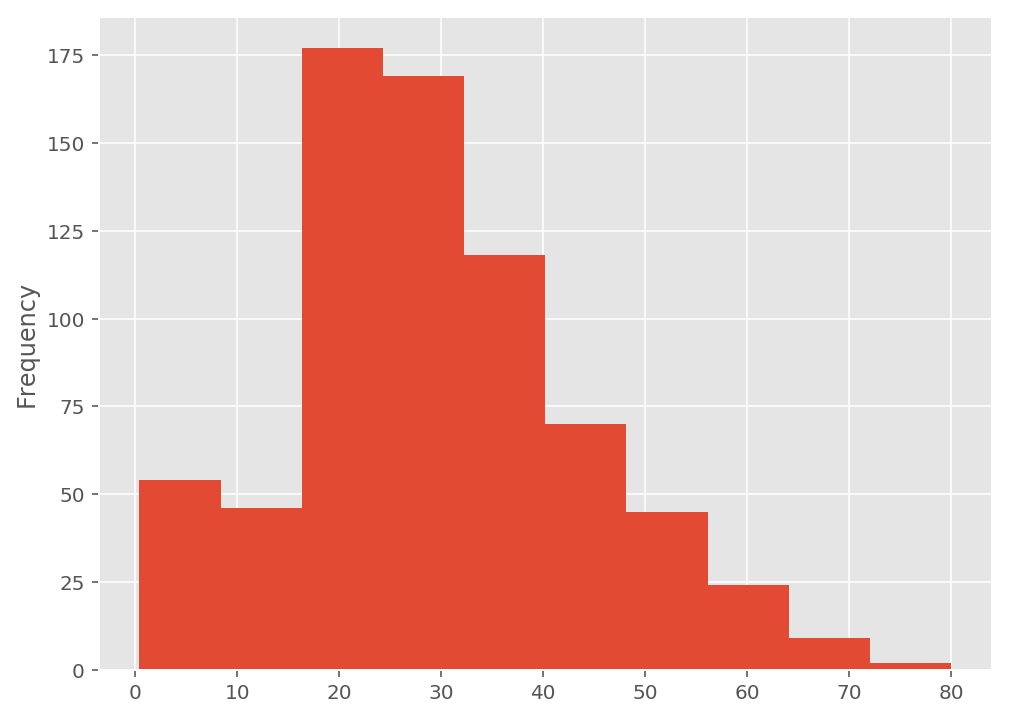

In [50]:
df['Age'].plot.hist()

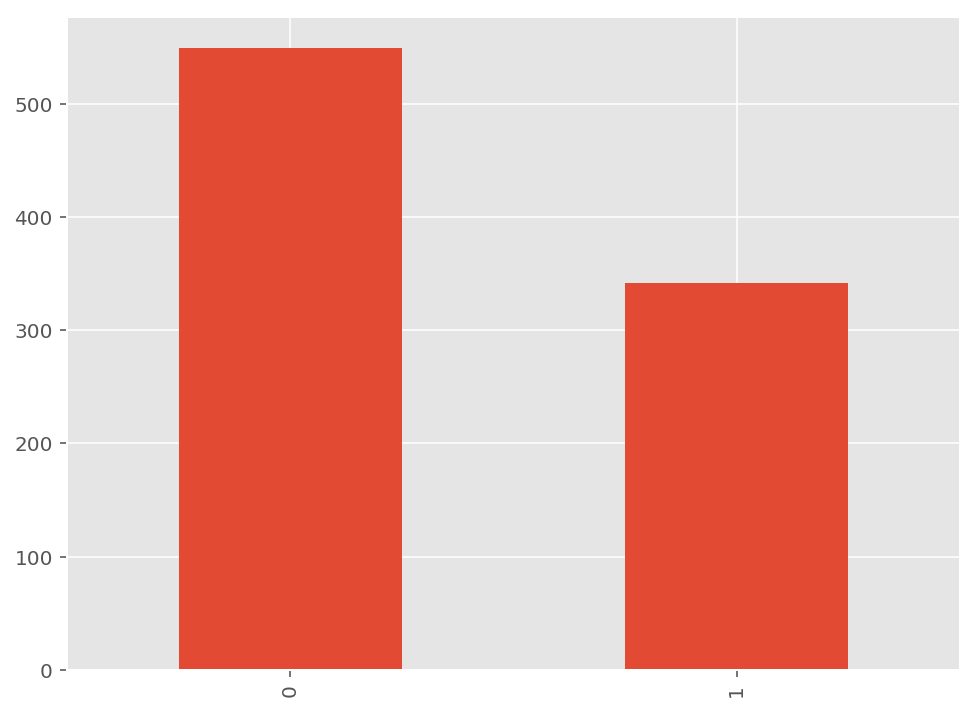

In [51]:
df['Survived'].value_counts().plot.bar()

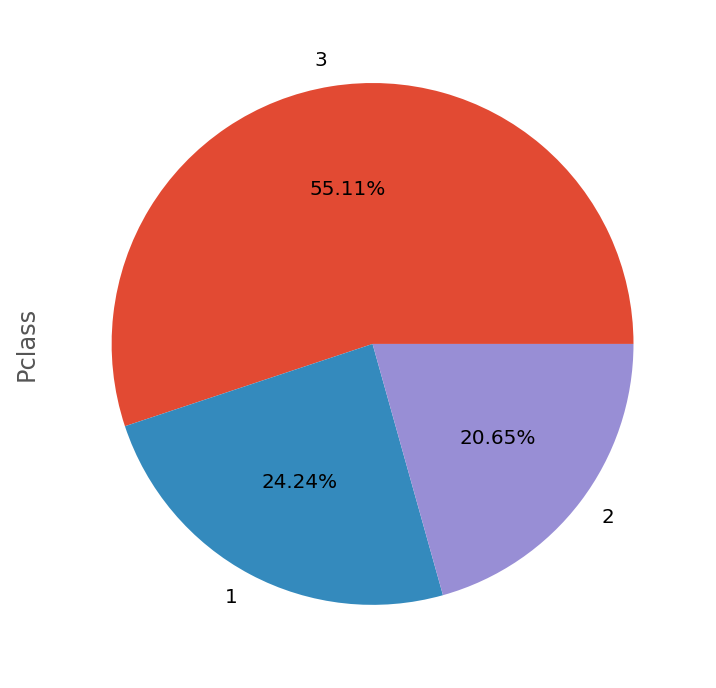

In [52]:
df['Pclass'].value_counts().plot.pie(autopct='%.2f%%')

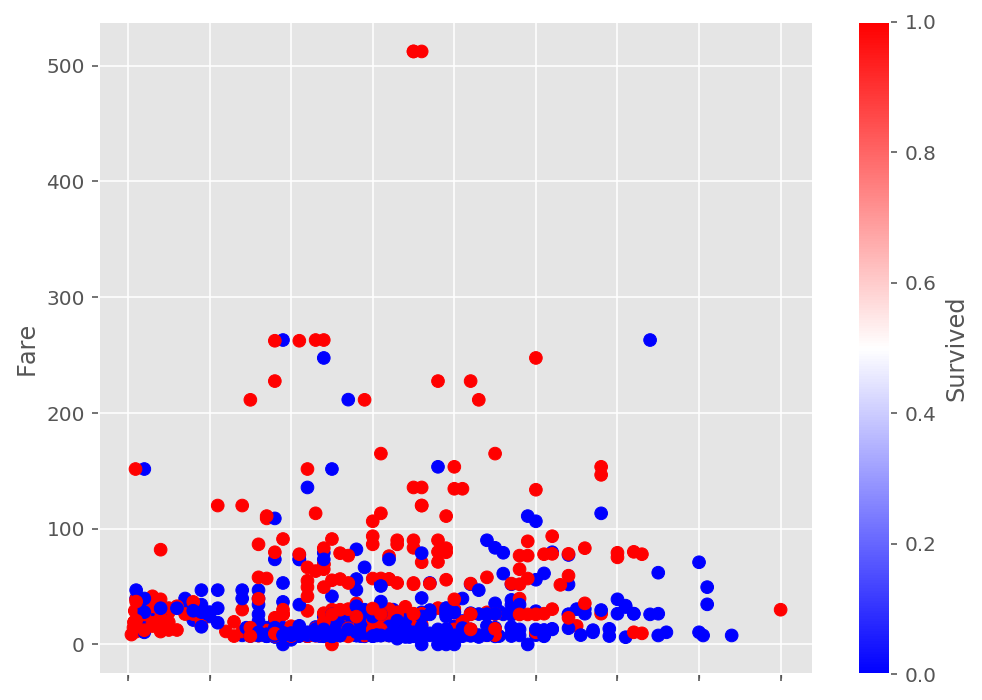

In [57]:
df.plot.scatter(x='Age', y='Fare', c='Survived', cmap='bwr', s=40)

### Data Manipulation and Processing 

#### Dropping columns

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.drop('Cabin', axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
df.head()  # dropping doesn't change the original dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
new_df = df.drop(['Ticket', 'Cabin', 'Name'], axis=1) # we can also pass inplace=True in drop() to change original dataframe
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### Handling missing values

In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [67]:
new_df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [65]:
# dropping rows with missing values
new_df.dropna().info()  # drop all rows with missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [68]:
new_df.dropna(thresh=9).info()  # drop rows that contain less than 9 non-missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [69]:
new_df.dropna(axis=1).info()  # drop all columns with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 48.8+ KB


In [71]:
mean_age = new_df['Age'].mean()
mean_age

29.69911764705882

In [72]:
new_df['Age'] = new_df['Age'].fillna(mean_age)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [75]:
# save the dataframe to csv
new_df.to_csv('processed_titanic.csv', index=False)

# Task 8
Load the titanic dataset as a Pandas dataframe and answer the following questions.

1. Generate a bar plot showing the number of males and females.
2. How many females survived?
3. What was the mean age of females?
4. What was the mean age of people who did not survive?
5. For each `Pclass`, how many people survived?
6. Assign the column `PassengerId` as the index of dataframe and drop the column `PassengerId`.
7. Using the new dataframe made in Q7, find the name of the passenger whose `PassgengerId` is `800`.